## Task Instruction
    A new company, Foresight Technologies, wants to know what factors affect top data scientists' choice of working for a particuar company. They want to recruit the best talents (in the Data Analysis, Data Engineering, Data Science, Machine Learning) in the world and build a formidable data science company. You have been tasked with providing this information by working on some data (use the data science salaries dataset to perform this task. Note, best talents include data scientists in the Senior Level [SE] and Expert Level [EX])
    
       Credits: Gabriel Onyedika Nnamoko
            Follow me on:
                
                Twitter: https://twitter.com/gabriel_nnamoko
                Facebook: https://facebook.com/gabriel-nnamoko-3
                LinkedIn: https://www.linkedin.com/in/gabriel-onyedika-nnamoko-2bb4891a1/

In [2]:
#Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Importing and viewing the dataset

df = pd.read_csv(r"C:\Users\GABBY\Downloads\data science salaries.zip")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [4]:
#Subsetting only tracks that are in the main data science categories (according to what the company specified in the task instructions )

data_science_tracks = df[df['job_title'].isin(["Data Engineer", "Machine Learning Engineer", "Data Scientist", "Data Analyst"])]
data_science_tracks

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
3744,2020,SE,FT,Machine Learning Engineer,40000,EUR,45618,HR,100,HR,S
3746,2021,MI,FT,Data Scientist,160000,SGD,119059,SG,100,IL,M
3748,2021,MI,FT,Data Engineer,24000,EUR,28369,MT,50,MT,L
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L


In [5]:
#Subsetting only those whose experience level are either SE (Senior Level) or EX (Expert Level)

senior_data_scientists = data_science_tracks[(data_science_tracks["experience_level"] == "SE") | (data_science_tracks["experience_level"] == "EX")]
senior_data_scientists

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
3714,2021,SE,FT,Data Scientist,110000,CAD,87738,CA,100,CA,S
3717,2021,SE,FT,Data Engineer,65000,EUR,76833,RO,50,GB,S
3730,2020,SE,FT,Data Scientist,80000,EUR,91237,AT,0,AT,S
3744,2020,SE,FT,Machine Learning Engineer,40000,EUR,45618,HR,100,HR,S


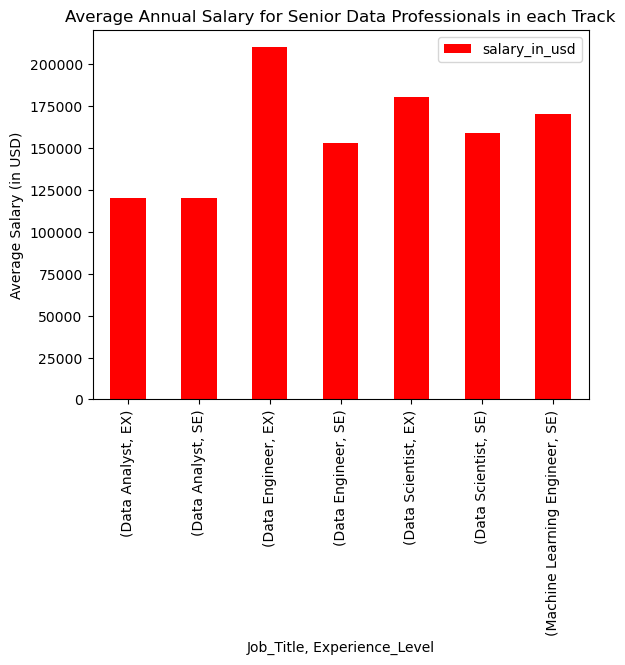

In [6]:
#Checking the mean salary for each track

salary_range = senior_data_scientists.groupby(["job_title", "experience_level"])["salary_in_usd"].mean()
salary_range = pd.DataFrame(salary_range)
salary_range.plot(kind='bar', title= "Average Annual Salary for Senior Data Professionals in each Track", ylabel="Average Salary (in USD)", xlabel= "Job_Title, Experience_Level", color='red')
plt.savefig("Average Salary for Top Data Professionals.png", bbox_inches='tight')
plt.show()

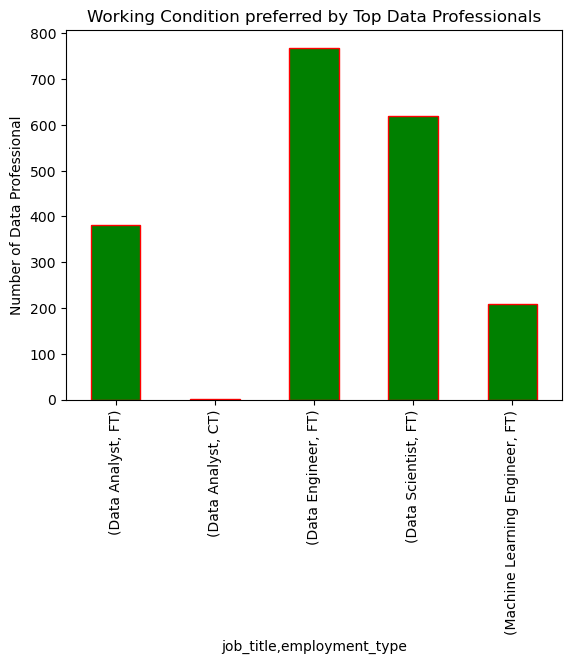

In [7]:
#Checking for employment type best loved by top data professionals
employment_type_check = senior_data_scientists.groupby('job_title')
employment_type_check = employment_type_check.employment_type.value_counts()
employment_type_check.plot(kind='bar', color='green', title="Working Condition preferred by Top Data Professionals", ylabel="Number of Data Professional", edgecolor='red')
plt.savefig("Preferred Working Conditions for Top Data Professionals.png", bbox_inches='tight')
plt.show()

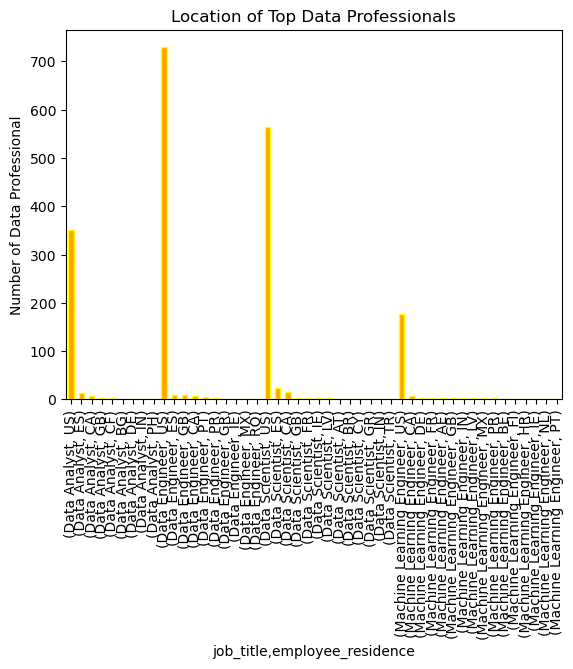

In [8]:
#Checking for where most top Data Professionals for each track resides
talent_residence = senior_data_scientists.groupby("job_title")
talent_residence = talent_residence.employee_residence.value_counts()
talent_residence.plot(kind='bar', color='orange', title="Location of Top Data Professionals", ylabel="Number of Data Professional", edgecolor='yellow')
plt.savefig("Location of Top Data Professionals.png", bbox_inches='tight')
plt.show()

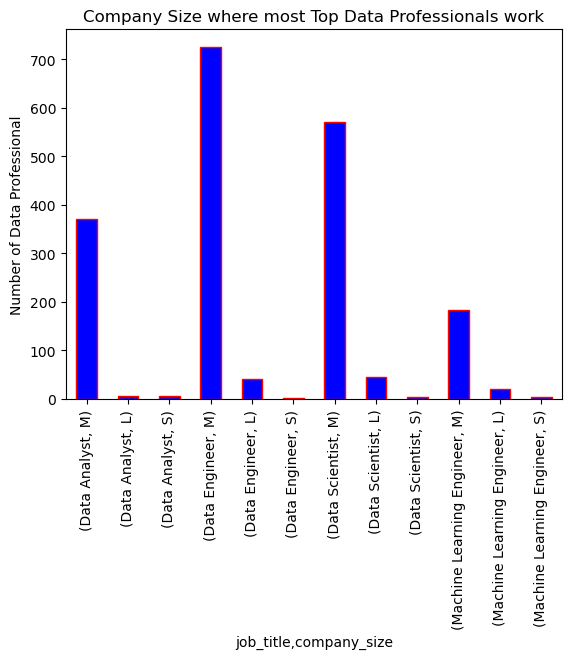

In [9]:
#Checking for the size of companies where most top Data Professionals for each track work
Company_size = senior_data_scientists.groupby("job_title")
Company_size = Company_size.company_size.value_counts()
Company_size.plot(kind='bar', color="blue", title="Company Size where most Top Data Professionals work", ylabel="Number of Data Professional", edgecolor='red')
plt.savefig("Company Size where Top Data Professionals work.png", bbox_inches='tight')
plt.show()

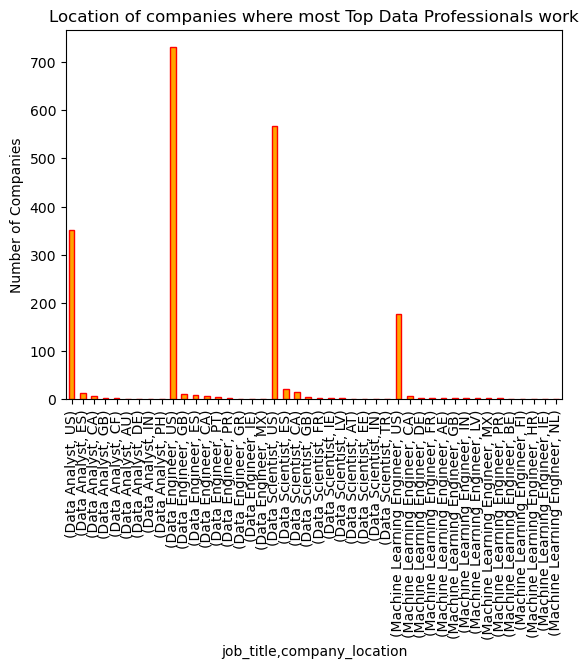

In [10]:
#Checking for the location of companies where most top Data Professionals for each track work
Company_location = senior_data_scientists.groupby("job_title")
Company_location = Company_location.company_location.value_counts()
Company_location.plot(kind='bar', color="orange", title="Location of companies where most Top Data Professionals work", ylabel="Number of Companies", edgecolor='red')
plt.savefig("Location of companies where Top Data Professionals work.png", bbox_inches='tight')
plt.show()